## Regression Pipeline

1. Get data.
2. Split into train and test.
3. Fit a model in the train set. Optional: Use cross validation to do that.
4. Measure model performance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Get data

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
#print(boston.DESCR)

In [5]:
X, y = boston.data, boston.target

In [6]:
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [7]:
y[0]

24.0

## 2. Split into train and test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

c:\users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
X_train.shape

(404, 13)

In [11]:
X.shape

(506, 13)

## 3. Create model

In [12]:
from sklearn.linear_model import LinearRegression

## 3.a Add polynomial features

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression
from sklearn.pipeline import make_pipeline

In [14]:
from sklearn.neural_network import MLPRegressor

In [15]:
pipe = make_pipeline(
    StandardScaler(), 
    PolynomialFeatures(degree=2, interaction_only=True), 
     MLPRegressor()
)

In [16]:
# Train the model
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=True)), ('mlpregressor', MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, earl...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])

## 4. Model validation

In [17]:
pipe.score(X_test, y_test) # R^2 metric (1 is good, 0 is bad, negative is worse than baseline.)

0.6709705008821745

In [18]:
y_pred = pipe.predict(X_test)

In [19]:
mesh = np.linspace(0,50, 100)

Text(0,0.5,'Predictions')

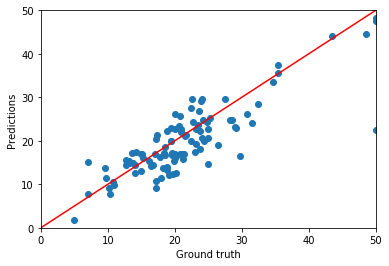

In [20]:
plt.scatter(y_test, y_pred)
plt.plot(mesh, mesh, 'r')
plt.xlim(0,50)
plt.ylim(0, 50)
plt.xlabel('Ground truth')
plt.ylabel('Predictions')